In [1]:
#Data cleaning source used: 
#https://medium.com/analytics-vidhya/diabetes-130-us-hospitals-for-years-1999-2008-e18d69beea4d

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from collections import Counter


In [2]:
data= pd.read_csv("/Users/yangpan/Desktop/School UMSL/CS4300Ai/diabetic_data.csv")

In [3]:
data.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

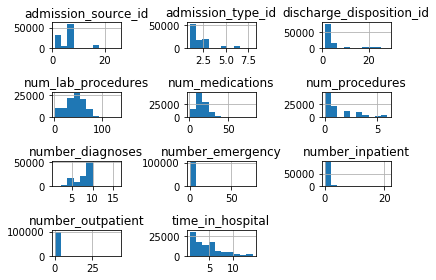

In [5]:
data2 = data[['age','admission_type_id','discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
              'num_lab_procedures','num_medications','num_procedures', 'number_emergency','number_outpatient','number_inpatient' ,
             'number_diagnoses',]]
data2.hist()
pyplot.tight_layout()
pyplot.show()

In [6]:
data['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

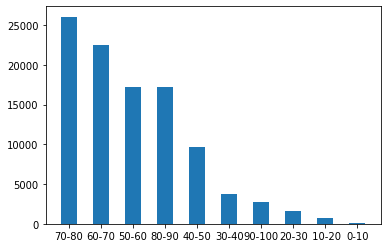

In [7]:
ageGroupLabel= ['70-80', '60-70', '50-60','80-90', '40-50', '30-40', '90-100', '20-30', ' 10-20', '0-10']
plt.bar(ageGroupLabel, data['age'].value_counts(), width=0.5) 
plt.show()

In [8]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
#replacing age group rage with it's median
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])
print(data['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [10]:
data['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

In [11]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
#removing duplicates 

data.dropna(inplace = True)
print('Total df = ', len(data))
print('Unique entries = ', len(np.unique(data['patient_nbr'])))
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(data))

Total df =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


In [13]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
data['discharge_disposition_id'].value_counts()

1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [15]:
data['admission_type_id'].value_counts()

1    36490
3    13917
2    13028
6     4588
5     3174
8      291
7       21
4        9
Name: admission_type_id, dtype: int64

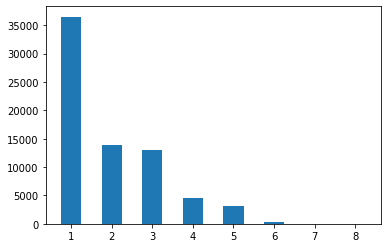

In [16]:
admissionTypeLabel= ['1', '2', '3','4', '5', '6', '7', '8']
plt.bar(admissionTypeLabel, data['admission_type_id'].value_counts(), width=0.5) 
plt.show()

In [17]:
data['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
?                   1948
Hispanic            1517
Other               1178
Asian                497
Name: race, dtype: int64

([<matplotlib.patches.Wedge at 0x1a20209350>,
 [Text(-0.7727614189691322, 0.7828408454806209, ''),
  Text(0.5778906333671756, -0.9359713755593623, ''),
  Text(1.0271420249899228, -0.3936740536276183, ''),
  Text(1.0749562017529093, -0.23338629846878137, ''),
  Text(1.0949970828807674, -0.1047921203269124, ''),
  Text(1.099737859930461, -0.024013317879246383, '')],
 [Text(-0.4215062285286175, 0.4270040975348841, '75%'),
  Text(0.3152130727457321, -0.5105298412141975, '18%'),
  Text(0.5602592863581397, -0.21473130197870088, '3%'),
  Text(0.5863397464106777, -0.127301617346608, '2%'),
  Text(0.5972711361167822, -0.057159338360134024, '2%'),
  Text(0.5998570145075242, -0.013098173388679845, '1%')])

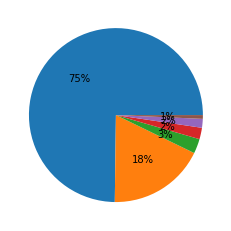

In [18]:
plt.pie(data['race'].value_counts(), autopct='%1.0f%%') 

In [19]:
#Try to group where patient was discharged
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [4, 6, 8]
                                                            else int(x) ))

data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))


data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)


data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)


data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))


In [20]:
data.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,?,5,18,1,1,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,NO
1,149190,55629189,Caucasian,Female,15,?,1,1,7,3,...,-20,10,-20,-20,-20,-20,-20,1,1,>30
2,64410,86047875,AfricanAmerican,Female,25,?,1,1,7,2,...,-20,-20,-20,-20,-20,-20,-20,-1,1,NO
3,500364,82442376,Caucasian,Male,35,?,1,1,7,2,...,-20,10,-20,-20,-20,-20,-20,1,1,NO
4,16680,42519267,Caucasian,Male,45,?,1,1,7,1,...,-20,0,-20,-20,-20,-20,-20,1,1,NO


In [21]:
#USE most common values to fill missing values in diagnosis code
diag_1 = Counter(list(data['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(data['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(data['diag_3'])).most_common(1)[0][0]

data['diag_1'] = data['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
data['diag_2'] = data['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
data['diag_3'] = data['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

In [22]:
#Domain Knowledge
#Type --> ICD Values --> Description

#Circulatory --> 390–459, 785 --> Diseases of the circulatory system
#Respiratory --> 460–519, 786 --> Diseases of the respiratory system
#Digestive --> 520–579, 787 --> Diseases of the digestive system
#Diabetes --> 250.xx --> Diabetes mellitus
#Injury --> 800–999 --> Injury and poisoning
#Musculoskeletal --> 710–739 --> Diseases of the musculoskeletal system and connective tissue
#Genitourinary --> 580–629, 788 --> Diseases of the genitourinary system
#Neoplasms --> 140–239 --> Neoplasms
#Pregnecy --> 630–679 --> Complications of pregnancy, childbirth, and the puerperium
#Other

In [23]:
print(len(np.unique(data['diag_1'])))  
print(len(np.unique(data['diag_2'])))  
print(len(np.unique(data['diag_3'])))  

data['diag_1'] = data['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_2'] = data['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_3'] = data['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))  

print(np.unique(data['diag_1']), '\n')           
print(np.unique(data['diag_2']), '\n')
print(np.unique(data['diag_3']), '\n')

695
695
757
['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 



In [24]:
print('BEFORE : ',np.unique(data['readmitted'].values))

data['readmitted'] = data['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

print('AFTER : ',np.unique(data['readmitted'].values))

BEFORE :  ['<30' '>30' 'NO']
AFTER :  [0 1]


In [25]:
data.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,?,5,18,1,1,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,149190,55629189,Caucasian,Female,15,?,1,1,7,3,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,64410,86047875,AfricanAmerican,Female,25,?,1,1,7,2,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,500364,82442376,Caucasian,Male,35,?,1,1,7,2,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,16680,42519267,Caucasian,Male,45,?,1,1,7,1,...,-20,0,-20,-20,-20,-20,-20,1,1,0


In [26]:
data.drop(['weight', 'payer_code'], axis = 1, inplace = True)

In [27]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,5,18,1,1,Pediatrics-Endocrinology,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,149190,55629189,Caucasian,Female,15,1,1,7,3,?,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,?,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,500364,82442376,Caucasian,Male,35,1,1,7,2,?,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,?,...,-20,0,-20,-20,-20,-20,-20,1,1,0


In [28]:
data.isin(['?']).sum(axis=0)

encounter_id                    0
patient_nbr                     0
race                         1921
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           33937
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [29]:
data.drop(['race', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [30]:
data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Female,5,5,18,1,1,41,0,1,0,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,Female,15,1,1,7,3,59,0,18,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,Female,25,1,1,7,2,11,5,13,2,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,Male,35,1,1,7,2,44,1,16,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,Male,45,1,1,7,1,51,0,8,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0


In [31]:
data['gender'].replace('Female', 0,inplace=True)
data['gender'].replace('Male', 1,inplace=True)

In [32]:
data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,5,5,18,1,1,41,0,1,0,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,0,15,1,1,7,3,59,0,18,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,0,25,1,1,7,2,11,5,13,2,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,1,35,1,1,7,2,44,1,16,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,1,45,1,1,7,1,51,0,8,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0


In [33]:
for col in data.columns: 
    print(col) 

gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [34]:
data.dtypes

gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone       

In [35]:
data2 = data.drop(['gender', 'diag_1', 'diag_2', 'diag_3'], axis =1 )
data2

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5,5,18,1,1,41,0,1,0,0,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,15,1,1,7,3,59,0,18,0,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,25,1,1,7,2,11,5,13,2,0,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,35,1,1,7,2,44,1,16,0,0,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,45,1,1,7,1,51,0,8,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,75,1,1,7,9,50,2,33,0,0,...,-20,0,-20,-20,-20,-20,-20,1,1,0
101755,45,1,1,7,14,73,6,26,0,1,...,-20,10,-20,-20,-20,-20,-20,1,1,0
101756,65,1,1,7,2,46,6,17,1,1,...,-20,0,-20,-20,-20,-20,-20,-1,1,0
101758,85,1,1,7,5,76,1,22,0,1,...,-20,10,-20,-20,-20,-20,-20,1,1,0


(array([  153.,   534.,  1122.,  2692.,  6840., 12368., 15763., 17889.,
        11267.,  1806.]),
 array([ 5., 14., 23., 32., 41., 50., 59., 68., 77., 86., 95.]),
 <a list of 10 Patch objects>)

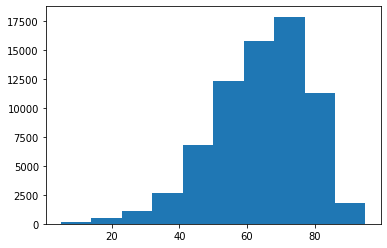

In [36]:
plt.hist(data['age'])

(array([48647.,     0.,     0.,     0.,     0., 13835.,     0.,     0.,
            0.,  7952.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

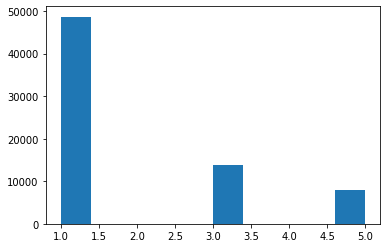

In [37]:
plt.hist(data['admission_type_id'])

In [38]:
data['admission_type_id'].value_counts()

1    48647
3    13835
5     7952
Name: admission_type_id, dtype: int64

([<matplotlib.patches.Wedge at 0x1a1ffd9110>,
 [Text(-1.0569513123265553, 0.3047194174501728, 'No'),
  Text(1.056951312326555, -0.3047194174501734, '<30 days')],
 [Text(-0.5765188976326665, 0.16621059133645788, '91%'),
  Text(0.5765188976326664, -0.1662105913364582, '9%')])

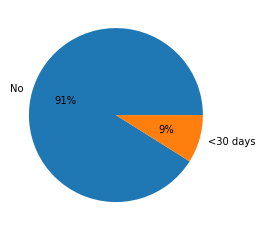

In [39]:
labelname2= ['No', '<30 days']
plt.pie(data['readmitted'].value_counts(), labels=labelname2, autopct='%1.0f%%') 

In [40]:
data['admission_type_id'].value_counts()

1    48647
3    13835
5     7952
Name: admission_type_id, dtype: int64

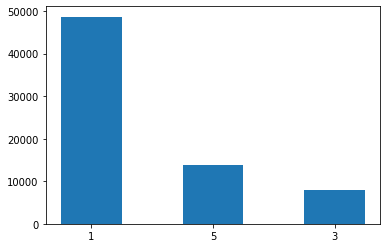

In [41]:
admissionTypeLabel2= ['1', '5', '3']
plt.bar(admissionTypeLabel2, data['admission_type_id'].value_counts(), width=0.5) 
plt.show()

# Normalization
#Technique used: Dividing values by maximum to convert to 0-1 value

Text(0.5, 1.0, 'histogram of age group')

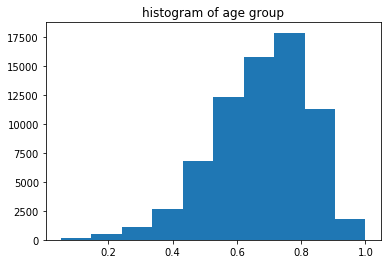

In [42]:
ageMax=data['age'].max()
numLabProcMax=data['num_lab_procedures'].max()
numProcMax = data['num_procedures'].max()
numEmergMax = data['number_emergency'].max()
numOutptMax = data['number_outpatient'].max()
numInptMax = data['number_inpatient'].max()
timeInHospMax = data['time_in_hospital'].max()
numMedMax = data['num_medications'].max()
numDiagMax = data['number_diagnoses'].max()

data['num_lab_procedures']=data['num_lab_procedures']/numLabProcMax
data['num_procedures'] = data['num_procedures']/numProcMax
data['number_emergency']= data['number_emergency']/numEmergMax
data['number_outpatient']=data['number_outpatient']/numOutptMax
data['number_inpatient']= data['number_inpatient']/numInptMax
data['time_in_hospital']=data['time_in_hospital']/timeInHospMax
data['num_medications']=data['num_medications']/numMedMax
data['number_diagnoses']=data['number_diagnoses']/numDiagMax
data['age'] = data['age']/ageMax
plt.hist(data['age'])
plt.title("histogram of age group")




Text(0.5, 1.0, 'histogram of number of lab procedures')

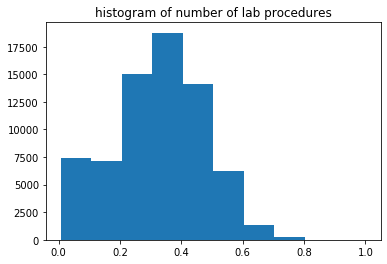

In [43]:

plt.hist(data['num_lab_procedures'])
plt.title("histogram of number of lab procedures")

In [44]:
data3 = data[['age','admission_type_id','discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
              'num_lab_procedures','num_medications','num_procedures', 'number_emergency','number_outpatient','number_inpatient' ,
             'number_diagnoses',]]

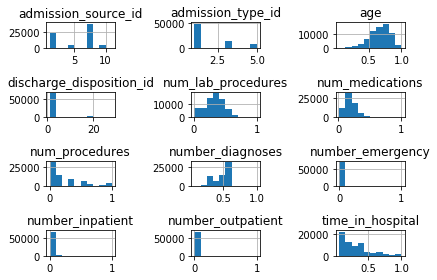

In [45]:
data3.hist()
pyplot.tight_layout()
pyplot.show()

In [46]:
data.to_csv('cleaned.csv')

# PHASE  2